<a href="https://colab.research.google.com/github/nastovikova/hello-world/blob/master/stat_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import scipy.stats as sp
import numpy as np

In [5]:
 df  = pd.read_csv('/Users/nastovikova/Documents/V6.txt','\t' )

FileNotFoundError: ignored

ПОсмотрим на наши данные


In [ ]:
sns.lmplot(data=df,x='x',y='y', fit_reg = False)
plt.grid()
# plt.legend()

NameError: ignored

Выберим Lasso для экстрополирования "прямой части", так как регулязация лассо откидывает шум

In [ ]:
model = Lasso(20)# lasso init
model.fit(df['x'].values.reshape(-1,1), df['y'].values.reshape(-1,1))#training
df['l_pred'] = model.predict(np.array(df['x']).reshape(-1,1))#lasso preds
df['l_y'] = df['y'] - df['l_pred']# to elliminate linear regression

Экстрополируем данные моделью

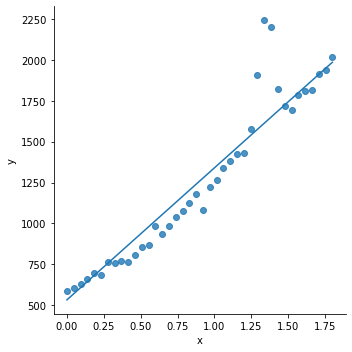

In [ ]:
sns.lmplot(data = df, x ='x', y = 'y', fit_reg = False)
l_pred = df['l_pred'].values
x = df['x'].values
plt.plot(x, l_pred, )

ВИзуализируем наши данные с вычетом линейной регресии

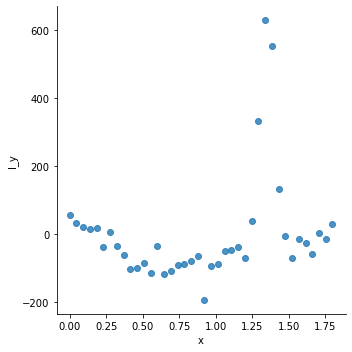

In [ ]:
sns.lmplot(data=df,x='x',y='l_y', fit_reg = False)


Посмотрим на распределение c вычетом линейной части

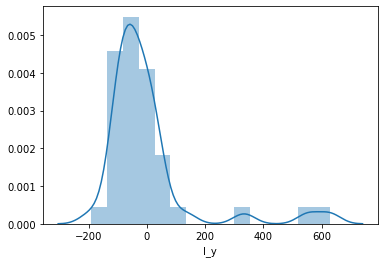

In [ ]:
sns.distplot(a=df['l_y'], )


Найдем среднее и дисперсию

In [ ]:
r_mean, r_std= df['l_y'].mean(),df['l_y'].std()

Посмотрим какие точки вышли за рамки нашей дисперсии, с ними я  и буду рабоатть для постороения и нахождения пика

In [ ]:
pic = df[df['l_y']==df['l_y'].max()]
pics = df[df['l_y'] > r_mean + r_std]
pics

,x,y,r_pred,r_y,l_pred,l_y
28,1.292308,1909.0,1601.643027,307.356973,1575.382864,333.617136
29,1.338462,2241.0,1641.953971,599.046029,1612.604378,628.395622
30,1.384615,2203.0,1682.264916,520.735084,1649.825891,553.174109


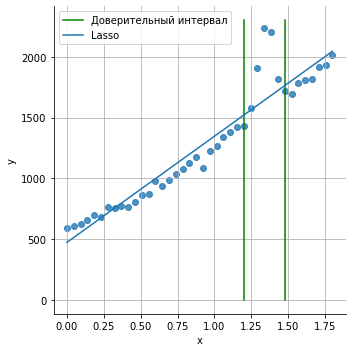

In [ ]:
import numpy as np


'''Сначало найду доверительный интервал и визуализирую его на первоначальном графике, чтобы понять где лежит пик'''
a = 0.95
y = pics['x']
mean = np.mean(y)
n = y.shape[0]
d = np.var(y, ddof=1) * n / (n - 1)
step = sp.t.ppf((a + 1) / 2, n - 1) * np.sqrt(d/n)


interval = [mean - step, mean + step]
interval
# df[((df['x']>interval[0]) & (df['x']<interval[1]))].plot(kind = 'scatter', x = 'x', y = 'l_y')
gaus = df[((df['x']>interval[0]) & (df['x']<interval[1]))]


d_i  = np.linspace(*interval, 100)

sns.lmplot(data=df,x='x',y='y', fit_reg = False)
plt.grid()
# plt.plot( interval,  [0]*2, c = 'g')
plt.plot([interval[0]]*2,  [2300, 0], c = 'g')
plt.plot([interval[1]]*2,  [2300, 0], c = 'g', label ='Доверительный интервал')
plt.plot(df['x'], df['r_pred'], label = 'Lasso')
plt.legend()

Все, что попало в довиритеьный интервал буду экстраполировать гауссовским распределением

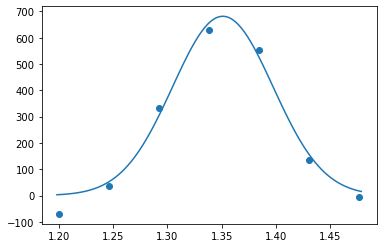

In [ ]:
def gauss_function(x, a, x0, d):
    return a*np.exp(-(x-x0)**2/(2*d))

# program
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gauss_function, df['x'], df['l_y'], p0 = [1,mean, d] )
#plot the fit results
plt.scatter(gaus['x'],gaus['l_y'])
gauses= gauss_function(d_i, *popt)
plt.plot(d_i,gauss_function(d_i, *popt))

Получаем значение пика

In [ ]:
print('Относительно линейной части max = {},\nАбсолютный max = {},\
         \nКоордината x ={}'.format(popt[0],popt[0]+model.predict(popt[1].reshape(-1,1)), popt[1]))

Относительно линейной части max = 681.6455402248941,
Абсолютный max = [2304.46338495],         
Координата x =1.3511260096372966


In [ ]:
y_m = popt[0]+model.predict(popt[1].reshape(-1,1))

Построение всех полученных результатов на едином графике

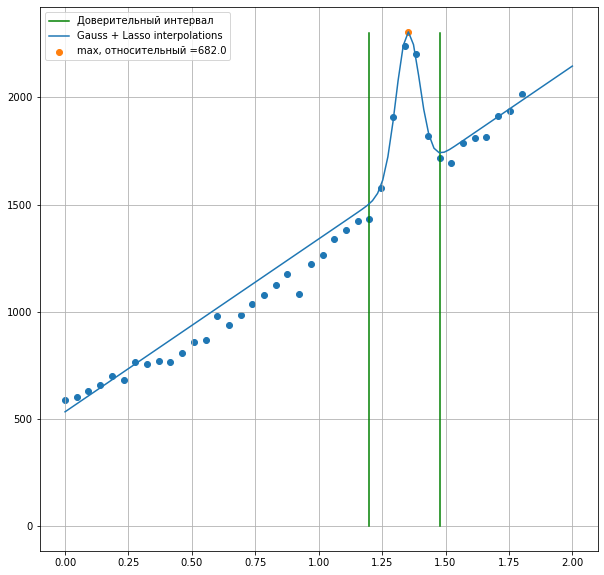

In [ ]:
interval1 = np.linspace(0, 2 ,100).reshape(-1,1)
model_y = model.predict(interval1).reshape(-1,1)
gaus_y = gauss_function(interval1, *popt)
plt.figure(figsize=(10,10))
plt.plot([interval[0]]*2,  [2300, 0], c = 'g')
plt.plot([interval[1]]*2,  [2300, 0], c = 'g', label ='Доверительный интервал')
plt.plot(interval1, gaus_y+model_y, label ='Gauss + Lasso interpolations')
plt.scatter(df['x'], df['y'])
plt.scatter(popt[1], y_m, label = 'max, относительный ={}'.format(round(popt[0])))
plt.grid()
plt.legend()


В данной работе нигде не ипользовалась визуализационные особенности данных(с точностью до 1 пика)